In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
raw_housing_data = pd.read_csv("house_dataset.csv")

In [9]:
raw_housing_data

ID Date House was Sold  Sale Price  No of Bedrooms  \
0      7129300520     14 October 2017    221900.0               3   
1      6414100192    14 December 2017    538000.0               3   
2      5631500400    15 February 2016    180000.0               2   
3      2487200875    14 December 2017    604000.0               4   
4      1954400510    15 February 2016    510000.0               3   
...           ...                 ...         ...             ...   
21608   263000018         14 May 2017    360000.0               3   
21609  6600060120    15 February 2016    400000.0               4   
21610  1523300141        14 June 2017    402101.0               2   
21611   291310100     15 January 2016    400000.0               3   
21612  1523300157     14 October 2017    325000.0               2   

       No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0                 1.00               1180.0              5650.0           1.0   
1                 2.25               2570.0              7242.0           2.0   
2                 1.00                770.0             10000.0           1.0   
3                 3.00               1960.0              5000.0           1.0   
4                 2.00               1680.0              8080.0           1.0   
...                ...                  ...                 ...           ...   
21608             2.50               1530.0              1131.0           3.0   
21609             2.50               2310.0              5813.0           2.0   
21610             0.75               1020.0              1350.0           2.0   
21611             2.50               1600.0              2388.0           2.0   
21612             0.75               1020.0              1076.0           2.0   

      Waterfront View No of Times Visited  ... Overall Grade  \
0                  No                 NaN  ...             7   
1                  No                 NaN  ...             7   
2                  No                 NaN  ...             6   
3                  No                 NaN  ...             7   
4                  No                 NaN  ...             8   
...               ...                 ...  ...           ...   
21608              No                 NaN  ...             8   
21609              No                 NaN  ...             8   
21610              No                 NaN  ...             7   
21611              No                 NaN  ...             8   
21612              No                 NaN  ...             7   

       Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                         1180.0                        0   
1                                         2170.0                      400   
2                                          770.0                        0   
3                                         1050.0                      910   
4                                         1680.0                        0   
...                                          ...                      ...   
21608                                     1530.0                        0   
21609                                     2310.0                        0   
21610                                     1020.0                        0   
21611                                     1600.0                        0   
21612                                     1020.0                        0   

       Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  \
0                           63               0  98178.0   47.5112   -122.257   
1                           67            1991  98125.0   47.7210   -122.319   
2                           85               0  98028.0   47.7379   -122.233   
3                           53               0  98136.0   47.5208   -122.393   
4                           31               0  98074.0   47.6168   -122.045   
...                        ...         

In [6]:
raw_housing_data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [7]:
raw_housing_data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [8]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

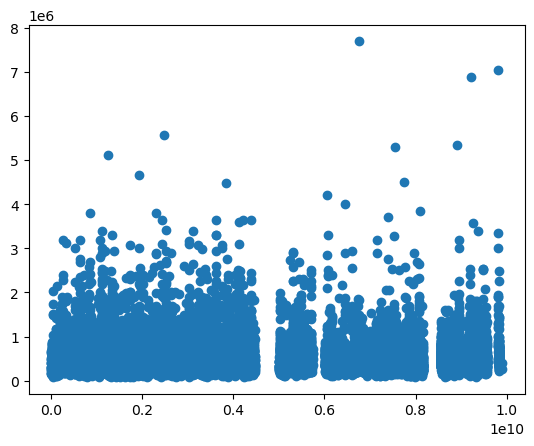

In [18]:
plt.scatter(x = raw_housing_data['ID'], y = raw_housing_data['Sale Price'])

<Axes: xlabel='Sale Price'>

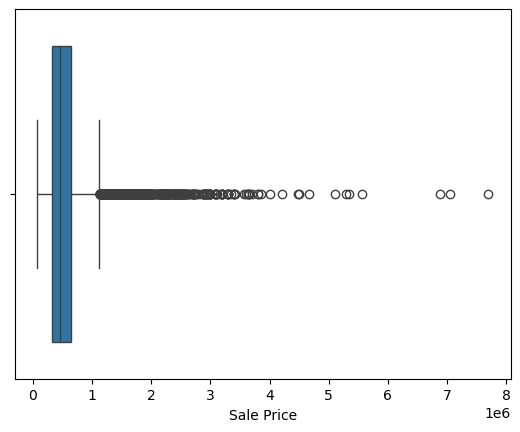

In [17]:
sns.boxplot(x= raw_housing_data['Sale Price'])

In [20]:
q1 = raw_housing_data['Sale Price'].quantile(0.25)
q3 = raw_housing_data['Sale Price'].quantile(0.75)


In [21]:
iqr = q3 - q1

In [22]:
iqr

323050.0

In [23]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 -1.5*iqr
upper_limit, lower_limit 

(1129575.0, -162625.0)

In [24]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [25]:
raw_housing_data['Sale Price'] = raw_housing_data['Sale Price'].apply(limit_imputer)

In [26]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [27]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [28]:
raw_housing_data.dropna(inplace = True, axis = 0, subset = ['Sale Price'])

In [29]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [ ]:
DataExploration - independent Numerical variables


In [57]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)', 'Latitude','Longitude',
                     'Living Area after Renovation (in Sqft)']

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
raw_housing_data[numerical_columns] = imputer.fit_transform(raw_housing_data[numerical_columns])


In [60]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [61]:
raw_housing_data['Zipcode'].shape

(21609,)

In [62]:
column = raw_housing_data['Zipcode'].values.reshape(-1,1)
column.shape


(21609, 1)

In [63]:
column = raw_housing_data['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
raw_housing_data['Zipcode'] = imputer.fit_transform(column)

In [64]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [65]:
raw_housing_data['Zipcode'] = raw_housing_data['Zipcode'].astype(object)

In [67]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [68]:
raw_housing_data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [69]:
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

raw_housing_data['No of Times Visited'] = raw_housing_data['No of Times Visited'].map(mapping)

In [70]:
raw_housing_data['No of Times Visited'].unique()

array([nan, '3', '4', '2', '1'], dtype=object)

In [71]:
raw_housing_data['Ever Renovated'] = np.where(raw_housing_data['Renovated Year'] == 0, 'No', 'Yes')

In [72]:
raw_housing_data.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ...  \
0              No                 NaN  ...   
1              No                 NaN  ...   
2              No                 NaN  ...   
3              No                 NaN  ...   
4              No                 NaN  ...   

  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                    1180.0                        0   
1                                    2170.0                      400   
2                                     770.0                        0   
3                                    1050.0                      910   
4                                    1680.0                        0   

   Age of House (in Years)  Renovated Year  Zipcode  Latitude Longitude  \
0                       63               0  98178.0   47.5112  -122.257   
1                       67            1991  98125.0   47.7210  -122.319   
2                       85               0  98028.0   47.7379  -122.233   
3                       53               0  98136.0   47.5208  -122.393   
4                       31               0  98074.0   47.6168  -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Ever Renovated  
0                                 5650              No  
1                                 7639             Yes  
2                                 8062              No  
3                                 5000              No  
4                                 7503              No  

[5 rows x 22 columns]

In [73]:
raw_housing_data['Purchase Year'] = pd.DatetimeIndex(raw_housing_data['Date House was Sold']).year

In [74]:
raw_housing_data['Years Since Renovation'] = np.where(raw_housing_data['Ever Renovated'] == 'Yes',
                                                     abs(raw_housing_data['Purchase Year'] - 
                                                        raw_housing_data['Renovated Year']), 0)

In [76]:
raw_housing_data.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Age of House (in Years)  \
0              No                 NaN  ...                      63   
1              No                 NaN  ...                      67   
2              No                 NaN  ...                      85   
3              No                 NaN  ...                      53   
4              No                 NaN  ...                      31   

   Renovated Year  Zipcode  Latitude  Longitude  \
0               0  98178.0   47.5112   -122.257   
1            1991  98125.0   47.7210   -122.319   
2               0  98028.0   47.7379   -122.233   
3               0  98136.0   47.5208   -122.393   
4               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft) Lot Area after Renovation (in Sqft)  \
0                                  1340.0                                5650   
1                                  1690.0                                7639   
2                                  2720.0                                8062   
3                                  1360.0                                5000   
4                                  1800.0                                7503   

   Ever Renovated  Purchase Year  Years Since Renovation  
0              No           2017                       0  
1             Yes           2017                      26  
2              No           2016                       0  
3              No           2017                       0  
4              No           2016                       0  

[5 rows x 24 columns]

In [77]:
raw_housing_data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [78]:
raw_housing_data.head()

ID  Sale Price  No of Bedrooms  No of Bathrooms  \
0  7129300520    221900.0               3             1.00   
1  6414100192    538000.0               3             2.25   
2  5631500400    180000.0               2             1.00   
3  2487200875    604000.0               4             3.00   
4  1954400510    510000.0               3             2.00   

   Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View  \
0               1180.0              5650.0           1.0              No   
1               2570.0              7242.0           2.0              No   
2                770.0             10000.0           1.0              No   
3               1960.0              5000.0           1.0              No   
4               1680.0              8080.0           1.0              No   

  No of Times Visited Condition of the House  ...  \
0                 NaN                   Fair  ...   
1                 NaN                   Fair  ...   
2                 NaN                   Fair  ...   
3                 NaN              Excellent  ...   
4                 NaN                   Fair  ...   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                     1180.0                        0   
1                                     2170.0                      400   
2                                      770.0                        0   
3                                     1050.0                      910   
4                                     1680.0                        0   

   Age of House (in Years)  Zipcode Latitude  Longitude  \
0                       63  98178.0  47.5112   -122.257   
1                       67  98125.0  47.7210   -122.319   
2                       85  98028.0  47.7379   -122.233   
3                       53  98136.0  47.5208   -122.393   
4                       31  98074.0  47.6168   -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Ever Renovated Years Since Renovation  
0                                 5650              No                      0  
1                                 7639             Yes                     26  
2                                 8062              No                      0  
3                                 5000              No                      0  
4                                 7503              No                      0  

[5 rows x 21 columns]